In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pathlib import Path
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")

In [3]:
aggregate=pd.read_csv('./aggregate.csv',engine='python')
aggregate.set_index('GEO_ID',inplace=True)

In [4]:
results=['democrat','republican']

In [5]:
agg_train, agg_test = train_test_split(aggregate,test_size=0.2,shuffle=True,random_state=121)

In [6]:
agg_corr=agg_train.iloc[:,2:].corr()
agg_corr.loc['democrat',np.abs(agg_corr['democrat'])>0.4]

afr_amer_pc       0.452121
asian_pc          0.423759
white_pc         -0.556840
urban             0.511503
rural            -0.511503
hs_deg           -0.440351
bac_deg           0.514666
democrat          1.000000
republican       -0.998694
democrat_old      0.982086
republican_old   -0.983211
Name: democrat, dtype: float64

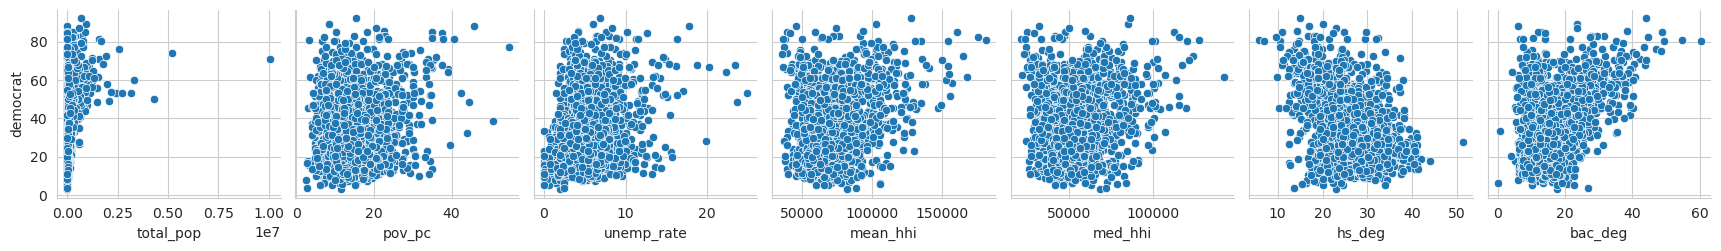

In [7]:
sns.pairplot(data=agg_train,x_vars=['total_pop','pov_pc', 'unemp_rate', 'mean_hhi','med_hhi', 'hs_deg', 'bac_deg'],y_vars=['democrat'])
plt.show()

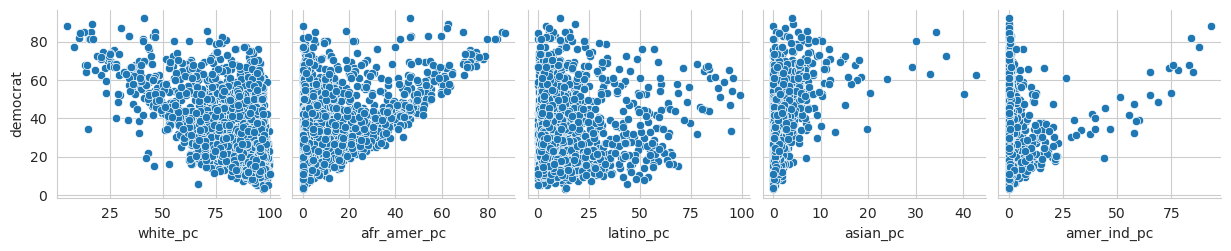

In [8]:
sns.pairplot(data=agg_train,x_vars=['white_pc','afr_amer_pc','latino_pc','asian_pc','amer_ind_pc'],y_vars=['democrat'])
plt.show()

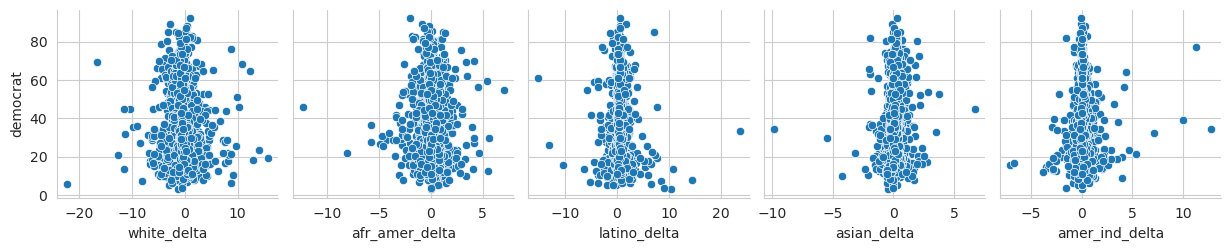

In [9]:
sns.pairplot(data=agg_train,x_vars=['white_delta','afr_amer_delta','latino_delta','asian_delta','amer_ind_delta'],y_vars=['democrat'])
plt.show()

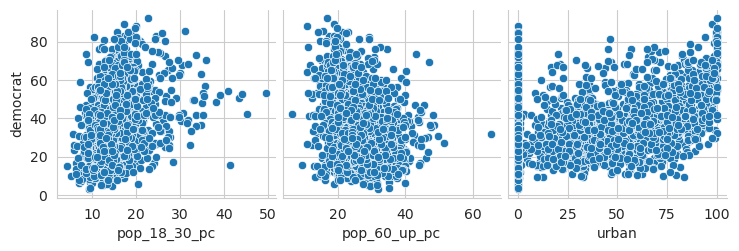

In [10]:
sns.pairplot(data=agg_train,x_vars=['pop_18_30_pc','pop_60_up_pc','urban'],y_vars=['democrat'])
plt.show()

    Variables to consider:
        pov_pc
        unemp_rate
        hs_deg
        bac_deg
        white_pc (there is high correlation with the other ethnic percentages)
        pop_18_30_pc
        urban

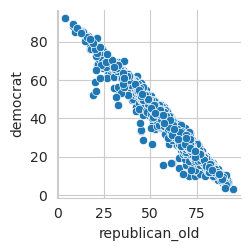

In [19]:
sns.pairplot(data=agg_train,x_vars=['republican_old'],y_vars=['democrat'])
plt.show()

In [38]:
agg_train['unemp_bac']=agg_train['unemp_rate']*agg_train['bac_deg']/100
agg_train['bac2']=agg_train['bac_deg']**2
agg_train['unemp_rate2']=np.log10(agg_train['unemp_rate'])
agg_train['log_pop']=np.log10(agg_train['total_pop'])
agg_train['young_unemp']=(agg_train['pop_18_30_pc']*agg_train['unemp_rate'])
agg_train['log_pov']=np.log10(agg_train['pov_pc'])
agg_train['pov_bac']=agg_train['pov_pc']*agg_train['bac_deg']
agg_train['log_urban_pop']=np.log10(agg_train['urban']*agg_train['total_pop'])

/home/srijan/anaconda3/envs/erdos_may_2024/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


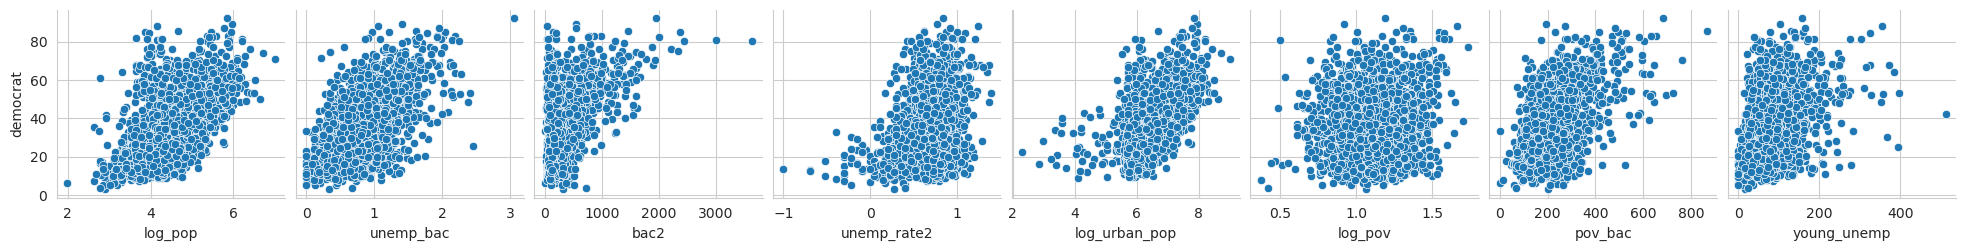

In [39]:
sns.pairplot(data=agg_train,x_vars=['log_pop', 'unemp_bac', 'bac2', 'unemp_rate2', 'log_urban_pop', 'log_pov', 'pov_bac', 'young_unemp'],y_vars=['democrat'])
plt.show()

In [46]:
agg_train[['democrat','republican']].values

array([[22.99062548, 74.82710927],
       [36.8440367 , 60.37614679],
       [ 6.74460432, 93.07553957],
       ...,
       [22.94778993, 75.46075261],
       [11.04100946, 88.32807571],
       [29.95941459, 68.78612717]])

    Possible correlations:
        Strong:
            white_pc
            log_pop
            urban
            unemp_bac = unemp_rate * bac_deg
            log_urban_pop
        Others:
            pov_bac
            pov_pc
            bac_deg
            unemp_rate
            pop_18_30_pc

In [21]:
for x in agg_train.index:
    agg_train.loc[x,'winner'] = agg_train.loc[x,'democrat'] > agg_train.loc[x,'republican']

In [37]:
agg_corr=agg_train.iloc[:,2:].corr()
agg_corr.loc['democrat',np.abs(agg_corr['democrat'])>0.4]

afr_amer_pc       0.452121
asian_pc          0.423759
white_pc         -0.556840
urban             0.511503
rural            -0.511503
hs_deg           -0.440351
bac_deg           0.514666
democrat          1.000000
republican       -0.998694
democrat_old      0.982086
republican_old   -0.983211
unemp_bac         0.620711
bac2              0.526890
log_pop           0.536275
pov_bac           0.544839
urban3            0.547484
log_urban_pop     0.531254
winner            0.780065
Name: democrat, dtype: float64

<Axes: xlabel='unemp_rate', ylabel='unemp_rate'>

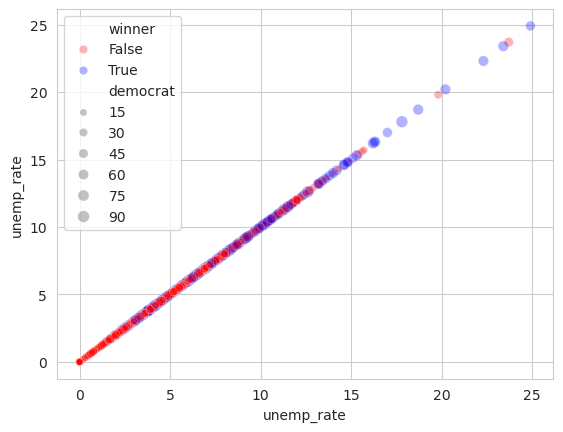

In [33]:
sns.scatterplot(data=agg_train,x='unemp_rate',y='unemp_rate',hue='winner',size='democrat',palette=['red','blue'], alpha=0.3)